In [12]:
import matplotlib.pyplot as plt
import xarray as xr
import fsspec
import pandas as pd

In [2]:

with fsspec.open("gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/rf/offline_diags/postphysics_ML_tendencies/transect_lon0.nc", "rb") as f:
    transects_rf = xr.open_dataset(f).load()
with fsspec.open("gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/nn-ensemble-model/offline_diags/dq1-dq2/transect_lon0.nc", "rb") as f:
    transects_nn_dq1_dq2 = xr.open_dataset(f).load()
with fsspec.open("gs://vcm-ml-experiments/2021-05-11-nudge-to-c3072-corrected-winds/nn-ensemble-model/offline_diags/dqu-dqv/transect_lon0.nc", "rb") as f:
    transects_nn_dqu_dqv = xr.open_dataset(f).load()
transects_nn = xr.merge([transects_nn_dq1_dq2, transects_nn_dqu_dqv])

In [78]:
def plot_transect_comparison(var, transects_nn, transects_rf):
    da = xr.concat(
        [
            transects_nn[var].sel(derivation="target"),
            transects_nn[var].sel(derivation="predict"),
            transects_rf[var].sel(derivation="predict"),
        ],
            dim="dataset"
    )
    f = da.plot(
        x="lat",
        y="pressure",
        col="dataset",
        robust=True,
        yincrease=False,
        
    )
    f.axes[0, 0].set_title("target")
    f.axes[0, 1].set_title("NN ensemble")
    f.axes[0, 2].set_title("RF")
    
    time_label = transects_nn.time.item().strftime("%Y-%m-%d: %H:%M:%S")
    f.fig.suptitle(f"Instantaneous transect at lon=0 deg, {time_label}", y=1.05)
    plt.show()
    return f

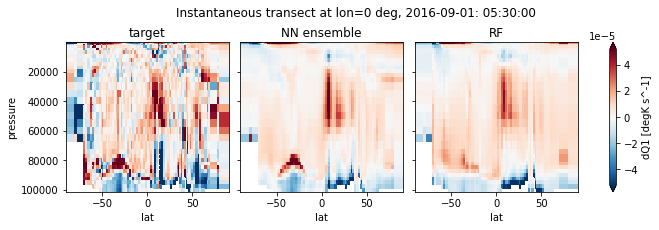

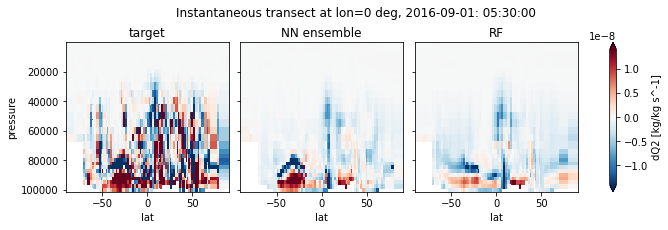

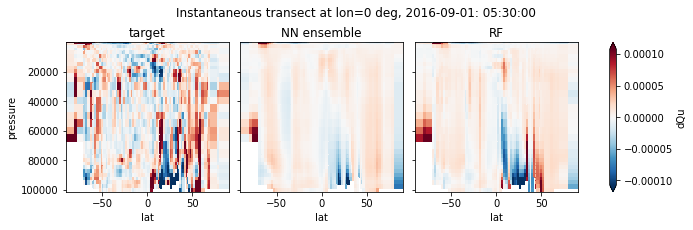

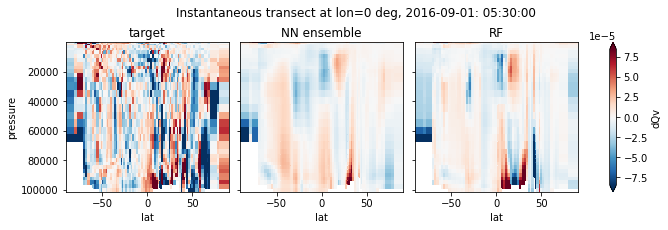

In [81]:
for output in ["dQ1", "dQ2", "dQu", "dQv"]:
    f = plot_transect_comparison(output, transects_nn, transects_rf) 
    f.fig.savefig(f"figures/offline_instantaneous_transect_prediction_{output}.png")